# **City of Chicago Traffic Crashes**

<div style="width: 2000px; overflow: hidden;">
  <header style="height: 5in; display: flex; justify-content: center; align-items: center;">
    <img src="..\chicago2.png" alt="Chicago skyline" style="height: 5in; width: 100%; object-fit: cover;"/>
  </header>
</div>


# **1. Business Understanding**

# **2. Data Understanding**

### **a) Imported relevant modules**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


#### **b) Loading the dataset**

In [3]:
df = pd.read_csv('..\Traffic_Crashes_-_Crashes_20241007.csv')
df.head()

,CRASH_RECORD_ID,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,23a79931ef555d54118f64dc9be2cf2dbf59636ce253f7...,NaN,09/05/2023 07:05:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DUSK,ANGLE,"FIVE POINT, OR MORE",...,2.0,0.0,2.0,0.0,19,3,9,NaN,NaN,NaN
1,2675c13fd0f474d730a5b780968b3cafc7c12d7adb661f...,NaN,09/22/2023 06:45:00 PM,50,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,DIVIDED - W/MEDIAN BARRIER,...,0.0,0.0,2.0,0.0,18,6,9,NaN,NaN,NaN
2,5f54a59fcb087b12ae5b1acff96a3caf4f2d37e79f8db4...,NaN,07/29/2023 02:45:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN (NOT RAISED),...,0.0,0.0,1.0,0.0,14,7,7,41.85412,-87.665902,POINT (-87.665902342962 41.854120262952)
3,7ebf015016f83d09b321afd671a836d6b148330535d5df...,NaN,08/09/2023 11:00:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",SIDESWIPE SAME DIRECTION,NOT DIVIDED,...,0.0,0.0,2.0,0.0,23,4,8,NaN,NaN,NaN
4,6c1659069e9c6285a650e70d6f9b574ed5f64c12888479...,NaN,08/18/2023 12:50:00 PM,15,OTHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,OTHER,...,1.0,0.0,1.0,0.0,12,6,8,NaN,NaN,NaN


### **c) Stratifed Random Sampling**

In [4]:
from sklearn.model_selection import train_test_split

# Assuming 'CRASH_TYPE' is the column to stratify by
data, out_of_sample_data = train_test_split(data, test_size=0.5, stratify=df['CRASH_TYPE'], random_state=42)

# Check the shape
print('Sampled Data Shape: ', data.shape)
print('Out of Sample Data Shape: ', out_of_sample_data.shape)

Sampled Data Shape:  (440198, 48)
Out of Sample Data Shape:  (440199, 48)


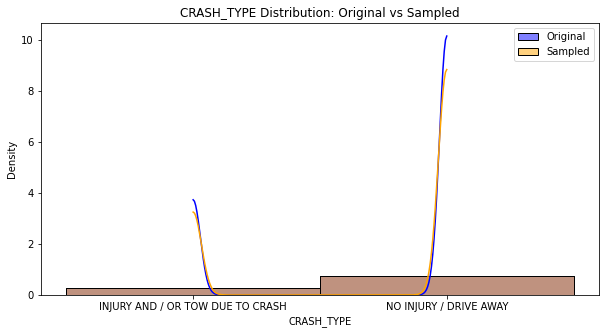

In [5]:
# Compare the distribution of a key feature like 'CRASH_TYPE'
plt.figure(figsize=(10, 5))

# Original dataset
sns.histplot(df['CRASH_TYPE'], color='blue', label='Original', stat='density', kde=True)

# Sampled dataset
sns.histplot(data['CRASH_TYPE'], color='orange', label='Sampled', stat='density', kde=True)

plt.legend()
plt.title('CRASH_TYPE Distribution: Original vs Sampled')
plt.show()


Based on the chart, the two distributions look very similar, which is a good indication that the stratified sampling has successfully preserved the overall distribution of the original dataset. This close alignment means the sample is representative of the original data, which is exactly what we aim for with stratified sampling.

### **d) Data Shape**

In [5]:
print('Our data has {} rows and {} columns'.format(data.shape[0], data.shape[1]))

Our data has 440198 rows and 48 columns


### **e) Data Description**

In [6]:
data.describe()

,POSTED_SPEED_LIMIT,LANE_CNT,STREET_NO,BEAT_OF_OCCURRENCE,NUM_UNITS,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE
count,440198.000000,99211.000000,440198.000000,440196.000000,440198.000000,439225.000000,439225.000000,439225.000000,439225.000000,439225.000000,439225.000000,439225.0,440198.000000,440198.000000,440198.000000,437100.000000,437100.000000
mean,28.417401,7.787675,3686.158899,1244.141641,2.035261,0.193115,0.001157,0.020129,0.108500,0.063330,2.001969,0.0,13.201350,4.120618,6.640753,41.854585,-87.672620
std,6.128995,1177.411499,2839.345543,704.842397,0.452966,0.569814,0.037126,0.167704,0.424578,0.321306,1.153522,0.0,5.571388,1.983092,3.365347,0.362846,0.740714
min,0.000000,0.000000,0.000000,111.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,1.000000,0.000000,-87.934014
25%,30.000000,2.000000,1253.000000,714.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,9.000000,2.000000,4.000000,41.783180,-87.721643
50%,30.000000,2.000000,3200.000000,1212.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.0,14.000000,4.000000,7.000000,41.874840,-87.674176
75%,30.000000,4.000000,5559.000000,1822.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.0,17.000000,6.000000,9.000000,41.924442,-87.633481
max,99.000000,299679.000000,13799.000000,6100.000000,18.000000,21.000000,3.000000,10.000000,21.000000,11.000000,48.000000,0.0,23.000000,7.000000,12.000000,42.022780,0.000000


Our data seems to prescribe conditions surrounding a crash as well as the crash's outcome.

The columns include:
1. CRASH_RECORD_ID: Unique ID for each crash, used to link to related datasets.
2. CRASH_DATE_EST_I: Estimated crash date if reported later.
3. CRASH_DATE: Date and time of the crash.
4. POSTED_SPEED_LIMIT: Speed limit at the crash location.
5. TRAFFIC_CONTROL_DEVICE: Traffic control device present.
6. DEVICE_CONDITION: Condition of the traffic control device.
7. WEATHER_CONDITION: Weather at the time of the crash.
8. LIGHTING_CONDITION: Lighting at the time of the crash.
9. FIRST_CRASH_TYPE: Type of first collision.
10. TRAFFICWAY_TYPE: Type of trafficway.
11. LANE_CNT: Number of through lanes.
12. ALIGNMENT: Street alignment.
13. ROADWAY_SURFACE_COND: Road surface condition.
14. ROAD_DEFECT: Road defects.
15. REPORT_TYPE: Type of report (at scene, at desk, amended).
16. CRASH_TYPE: Severity classification of the crash.
17. INTERSECTION_RELATED_I: Whether an intersection played a role.
18. NOT_RIGHT_OF_WAY_I: Whether the crash occurred outside the public right-of-way.
19. HIT_AND_RUN_I: Whether it was a hit-and-run.
20. DAMAGE: Estimated damage.
21. DATE_POLICE_NOTIFIED: Date police were notified.
22. PRIM_CONTRIBUTORY_CAUSE: Primary cause of the crash.
23. SEC_CONTRIBUTORY_CAUSE: Secondary cause of the crash.
24. STREET_NO: Street address number.
25. STREET_DIRECTION: Street address direction.
26. STREET_NAME: Street address name.
27. BEAT_OF_OCCURRENCE: Chicago Police Department Beat ID.
28. PHOTOS_TAKEN_I: Whether photos were taken.
29. STATEMENTS_TAKEN_I: Whether statements were taken.
30. DOORING_I: Whether it involved dooring.
31. WORK_ZONE_I: Whether it occurred in a work zone.
32. WORK_ZONE_TYPE: Type of work zone.
33. WORKERS_PRESENT_I: Whether workers were present.
34. NUM_UNITS: Number of units involved.
35. MOST_SEVERE_INJURY: Most severe injury sustained1.
36. INJURIES_TOTAL: Total number of injuries.
37. NJURIES_FATAL: Number of fatal injuries.
38. INJURIES_INCAPACITATING: Number of incapacitating injuries.
39. INJURIES_NON_INCAPACITATING: Number of non-incapacitating injuries.
40. INJURIES_REPORTED_NOT_EVIDENT: Number of reported but not evident injuries.
41. INJURIES_NO_INDICATION: Number of no indication of injuries.
42. INJURIES_UNKNOWN: Number of unknown injuries.
43. CRASH_HOUR: Hour of the crash.
44. CRASH_DAY_OF_WEEK: Day of the week of the crash.
45. CRASH_MONTH: Month of the crash.
46. LATITUDE: Latitude of the crash location.
47. LONGITUDE: Longitude of the crash location.
48. LOCATION: Geographic location of the crash.

### **f) Duplicates**

In [7]:
data.duplicated().sum()

0

There are no duplicates in our dataset

Our dataset is quite large with several columns that seem to contain similar information. Below we inspect datatypes

### **g) Datatypes**

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 440198 entries, 495307 to 484789
Data columns (total 48 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   CRASH_RECORD_ID                440198 non-null  object 
 1   CRASH_DATE_EST_I               32640 non-null   object 
 2   CRASH_DATE                     440198 non-null  object 
 3   POSTED_SPEED_LIMIT             440198 non-null  int64  
 4   TRAFFIC_CONTROL_DEVICE         440198 non-null  object 
 5   DEVICE_CONDITION               440198 non-null  object 
 6   WEATHER_CONDITION              440198 non-null  object 
 7   LIGHTING_CONDITION             440198 non-null  object 
 8   FIRST_CRASH_TYPE               440198 non-null  object 
 9   TRAFFICWAY_TYPE                440198 non-null  object 
 10  LANE_CNT                       99211 non-null   float64
 11  ALIGNMENT                      440198 non-null  object 
 12  ROADWAY_SURFACE_COND     

Our dataset is quite large with several columns that seem to contain similar information.

**Our Target Variable is CRASH TYPE as it aligns best with our objective of predicting Crash Severity given the column descriptions**

Below we drop some columns that have limited useful information given our overall objective


In [9]:
columns_to_drop = ['CRASH_RECORD_ID','CRASH_DATE_EST_I', 'CRASH_DATE','REPORT_TYPE', 'TRAFFIC_CONTROL_DEVICE',
    'PHOTOS_TAKEN_I','STATEMENTS_TAKEN_I','DOORING_I','STREET_NO','STREET_DIRECTION','STREET_NAME','DATE_POLICE_NOTIFIED',
    'BEAT_OF_OCCURRENCE','LANE_CNT','LATITUDE', 'LONGITUDE','INJURIES_REPORTED_NOT_EVIDENT','INJURIES_NO_INDICATION','INJURIES_UNKNOWN']

relevant_data = data.drop(columns = columns_to_drop, axis=1)
relevant_data.head()

,POSTED_SPEED_LIMIT,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,CRASH_TYPE,...,NUM_UNITS,MOST_SEVERE_INJURY,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LOCATION
495307,30,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,16,4,7,POINT (-87.743128248354 41.811989599987)
269890,35,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,13,2,4,POINT (-87.620947158386 41.685271222904)
205916,30,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,19,7,8,POINT (-87.734954554159 41.906261437881)
399022,30,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,ONE-WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,12,3,3,POINT (-87.622611816348 41.806360139287)
704592,35,FUNCTIONING PROPERLY,CLEAR,DARKNESS,TURNING,T-INTERSECTION,STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,...,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,1,1,10,POINT (-87.7102651406 41.76438308938)


### **h) Missing Values**

Next, we will look at missing data by column percentage.

In [10]:
relevant_data.isna().sum()/data.shape[0]*100

POSTED_SPEED_LIMIT              0.000000
DEVICE_CONDITION                0.000000
WEATHER_CONDITION               0.000000
LIGHTING_CONDITION              0.000000
FIRST_CRASH_TYPE                0.000000
TRAFFICWAY_TYPE                 0.000000
ALIGNMENT                       0.000000
ROADWAY_SURFACE_COND            0.000000
ROAD_DEFECT                     0.000000
CRASH_TYPE                      0.000000
INTERSECTION_RELATED_I         77.005348
NOT_RIGHT_OF_WAY_I             95.460225
HIT_AND_RUN_I                  68.620257
DAMAGE                          0.000000
PRIM_CONTRIBUTORY_CAUSE         0.000000
SEC_CONTRIBUTORY_CAUSE          0.000000
WORK_ZONE_I                    99.439343
WORK_ZONE_TYPE                 99.570648
WORKERS_PRESENT_I              99.857110
NUM_UNITS                       0.000000
MOST_SEVERE_INJURY              0.222400
INJURIES_TOTAL                  0.221037
INJURIES_FATAL                  0.221037
INJURIES_INCAPACITATING         0.221037
INJURIES_NON_INC

In [11]:
print([col for col in relevant_data.columns 
    if relevant_data[col].isna().sum()/relevant_data.shape[0]*100 > 50])

['INTERSECTION_RELATED_I', 'NOT_RIGHT_OF_WAY_I', 'HIT_AND_RUN_I', 'WORK_ZONE_I', 'WORK_ZONE_TYPE', 'WORKERS_PRESENT_I']


From a review of the data, we need to distinguish between missing values where this indicates 'no' or 'negative' from situations with actual missing data.

Based on the most affected columns:

- INTERSECTION_RELATED_I - missing value seem to equal N (no).
- HIT_AND_RUN_I - missing value seem to equal N (no).
- NOT_RIGHT_OF_WAY_I - missing value seem to equal N (no).
- WORKZONE_I - missing value seem to equal N (no).
- WORK_ZONE_TYPE -- missing value seem to equal not a work zone.
- WORKERS_PRESENT_I- missing value seem to equal N (no).

Below we deal with missing values for these columns

In [12]:
columns_to_fill_with_N = ['INTERSECTION_RELATED_I', 'NOT_RIGHT_OF_WAY_I', 
    'HIT_AND_RUN_I', 'WORK_ZONE_I', 'WORK_ZONE_TYPE', 'WORKERS_PRESENT_I']  #columns with many missing values which should actually be N

# Fill the selected columns with 'N'
relevant_data[columns_to_fill_with_N] = relevant_data[columns_to_fill_with_N].fillna('N') #fill the columns with N

# Fill 'WORK_ZONE_TYPE' with 'Other'
relevant_data['WORK_ZONE_TYPE'] = relevant_data['WORK_ZONE_TYPE'].fillna('Other') #fill this column with Other
relevant_data.head()


,POSTED_SPEED_LIMIT,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,CRASH_TYPE,...,NUM_UNITS,MOST_SEVERE_INJURY,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LOCATION
495307,30,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,16,4,7,POINT (-87.743128248354 41.811989599987)
269890,35,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,13,2,4,POINT (-87.620947158386 41.685271222904)
205916,30,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,19,7,8,POINT (-87.734954554159 41.906261437881)
399022,30,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,ONE-WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,12,3,3,POINT (-87.622611816348 41.806360139287)
704592,35,FUNCTIONING PROPERLY,CLEAR,DARKNESS,TURNING,T-INTERSECTION,STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,...,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,1,1,10,POINT (-87.7102651406 41.76438308938)


In [13]:
relevant_data.isna().sum()

POSTED_SPEED_LIMIT                0
DEVICE_CONDITION                  0
WEATHER_CONDITION                 0
LIGHTING_CONDITION                0
FIRST_CRASH_TYPE                  0
TRAFFICWAY_TYPE                   0
ALIGNMENT                         0
ROADWAY_SURFACE_COND              0
ROAD_DEFECT                       0
CRASH_TYPE                        0
INTERSECTION_RELATED_I            0
NOT_RIGHT_OF_WAY_I                0
HIT_AND_RUN_I                     0
DAMAGE                            0
PRIM_CONTRIBUTORY_CAUSE           0
SEC_CONTRIBUTORY_CAUSE            0
WORK_ZONE_I                       0
WORK_ZONE_TYPE                    0
WORKERS_PRESENT_I                 0
NUM_UNITS                         0
MOST_SEVERE_INJURY              979
INJURIES_TOTAL                  973
INJURIES_FATAL                  973
INJURIES_INCAPACITATING         973
INJURIES_NON_INCAPACITATING     973
CRASH_HOUR                        0
CRASH_DAY_OF_WEEK                 0
CRASH_MONTH                 

We can drop the remaining columns with missing values as their number is small and unlikely to affect the overall data distribution materially

In [14]:
relevant_data.dropna(inplace=True)
relevant_data.isna().sum().sum()

0

### **i) Variable Types**

In [15]:
# Separate categorical columns
categorical_columns = relevant_data.select_dtypes(include=['object']).columns.tolist()

# Separate continuous (numerical) columns
continuous_columns = relevant_data.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Display the separated columns
print(f"We have {len(categorical_columns)} categorical columns and {len(continuous_columns)} continuous columns")

We have 20 categorical columns and 9 continuous columns


# **3. EDA & Data Preparation**

### **a) Basic Descriptive Statistics**

- **Continuous Columns:** We will get an overview of the distribution, central tendency, and spread

In [16]:
relevant_data[continuous_columns].describe()

,POSTED_SPEED_LIMIT,NUM_UNITS,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH
count,436127.000000,436127.000000,436127.000000,436127.000000,436127.000000,436127.000000,436127.000000,436127.000000,436127.000000
mean,28.436123,2.036661,0.193235,0.001158,0.020139,0.108604,13.206172,4.122237,6.640694
std,6.084906,0.452017,0.569977,0.037166,0.167665,0.424789,5.564940,1.982862,3.365597
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,30.000000,2.000000,0.000000,0.000000,0.000000,0.000000,9.000000,2.000000,4.000000
50%,30.000000,2.000000,0.000000,0.000000,0.000000,0.000000,14.000000,4.000000,7.000000
75%,30.000000,2.000000,0.000000,0.000000,0.000000,0.000000,17.000000,6.000000,9.000000
max,99.000000,18.000000,21.000000,3.000000,10.000000,21.000000,23.000000,7.000000,12.000000


Our continuous data seems to have different scales across different features. Hence we may need to scale it

- **Categorical Columns:** We will get an overview of the distribution in each categorical column

In [17]:
relevant_data[categorical_columns].describe()

,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,CRASH_TYPE,INTERSECTION_RELATED_I,NOT_RIGHT_OF_WAY_I,HIT_AND_RUN_I,DAMAGE,PRIM_CONTRIBUTORY_CAUSE,SEC_CONTRIBUTORY_CAUSE,WORK_ZONE_I,WORK_ZONE_TYPE,WORKERS_PRESENT_I,MOST_SEVERE_INJURY,LOCATION
count,436127,436127,436127,436127,436127,436127,436127,436127,436127,436127,436127,436127,436127,436127,436127,436127,436127,436127,436127,436127
unique,8,12,6,18,20,6,7,7,2,2,2,2,3,40,40,2,5,2,5,199093
top,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,N,N,N,"OVER $1,500",UNABLE TO DETERMINE,NOT APPLICABLE,N,N,N,NO INDICATION OF INJURY,POINT (-87.905309125103 41.976201139024)
freq,249232,343220,280923,101226,188767,426017,322602,347852,318976,340243,418189,304911,273573,170389,179363,434268,434268,435576,374863,699


Some of our categorical features have a lot of categories. Hence we may need to use **target encoding** to deal with high cardinality.

Target encoding replaces each category with the mean of the target variable for that category. This reduces the dimensionality by not increasing the number of features, which can help in preventing overfitting. Example: If a category is frequently associated with fatalities, the encoding will reflect that association. Target encoding should not alter the shape of our data.

In [18]:
# Separate categorical columns
categorical_columns = relevant_data.select_dtypes(include=['object']).columns.tolist()

# Separate continuous (numerical) columns
continuous_columns = relevant_data.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Display the separated columns
print(f"We have {len(categorical_columns)} categorical columns and {len(continuous_columns)} continuous columns")

We have 20 categorical columns and 9 continuous columns


### **c) Visualizations**

We will use visualizations to help display the relationships and patterns in our data intuitively.

- **Distribution of continuous features:**

**1) Histograms**

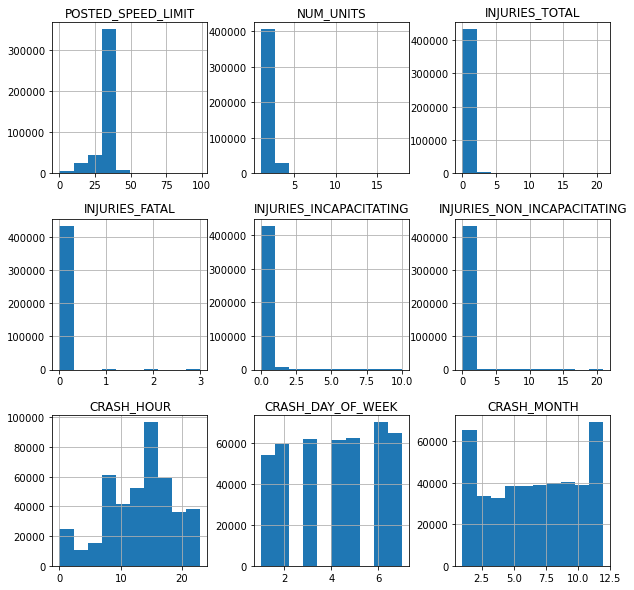

In [19]:
import matplotlib.pyplot as plt
relevant_data[continuous_columns].hist(figsize=(10, 10), bins=10) #plot histograms
plt.show()


Although we currently classify 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH', as continuous features, their distributions imply that they represent discrete time periods rather than a continuous range. Each hour, day, and month is a distinct category which may have unique traffic patterns. We will convert these features to categorical

In [25]:
time_col = ['CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH']

relevant_data[time_col] = relevant_data[time_col].astype('category') #convert to categorical data type

continuous_columns = [col for col in continuous_columns if col not in time_col] #remove from list of continuous columns

[categorical_columns.append(col) for col in time_col] #add to categorical columns

print(f"We have {len(categorical_columns)} categorical columns and {len(continuous_columns)} continuous columns")

We have 26 categorical columns and 6 continuous columns


We can also visualize our continuous columns using boxplots to check for outliers

**2) Boxplots**

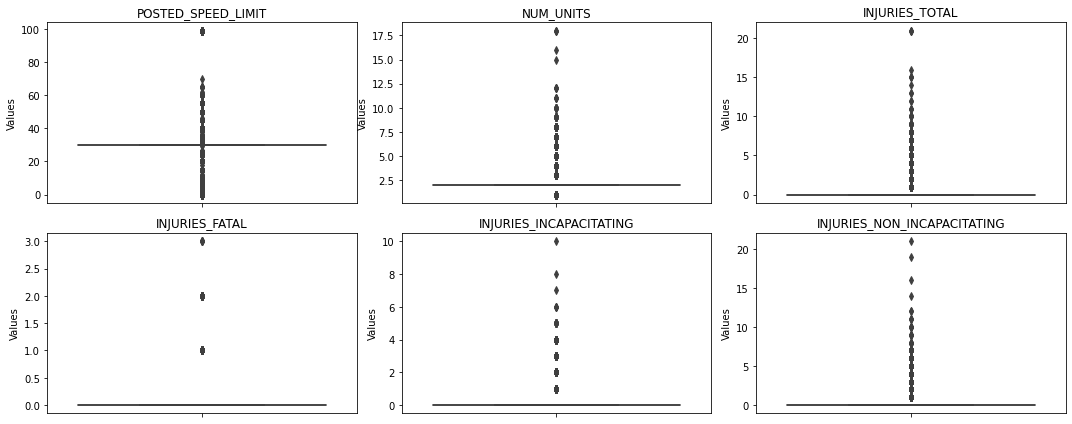

In [21]:
# Create a grid of subplots with 2 rows and 3 columns
fig, axes = plt.subplots(2, 3, figsize=(15, 6))

# Iterate over the continuous columns and plot each one in a separate subplot
for i, col in enumerate(continuous_columns):
    # Get the appropriate subplot
    ax = axes[i // 3, i % 3]
    
    sns.boxplot(y=relevant_data[col], ax=ax)
    
    # Set the title of the subplot
    ax.set_title(col)
    
    # Set labels for y-axis
    ax.set_ylabel("Values")

# Adjust the layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()


Looking at the boxplots, our continuous columns appear concentrated in certain values likely due to the nature of the crash data. It seems like there might be a lot of zero values which might give the appearance of categories but the features are actually continuous.

- **POSTED_SPEED_LIMIT:** This is continuous, but there might be common values (e.g., 30, 40 mph) that make it appear categorical.
- **NUM_UNITS:** The number of units (vehicles, people) involved in a crash. This is likely continuous (discrete, but not categorical).
- **INJURIES_TOTAL, INJURIES_FATAL, INJURIES_INCAPACITATING, INJURIES_NON_INCAPACITATING:** These are continuous as they count the number of injuries, though they might have many zeroes.

Further, our data does not seem to have any outliers.

**3) Bar Plots**

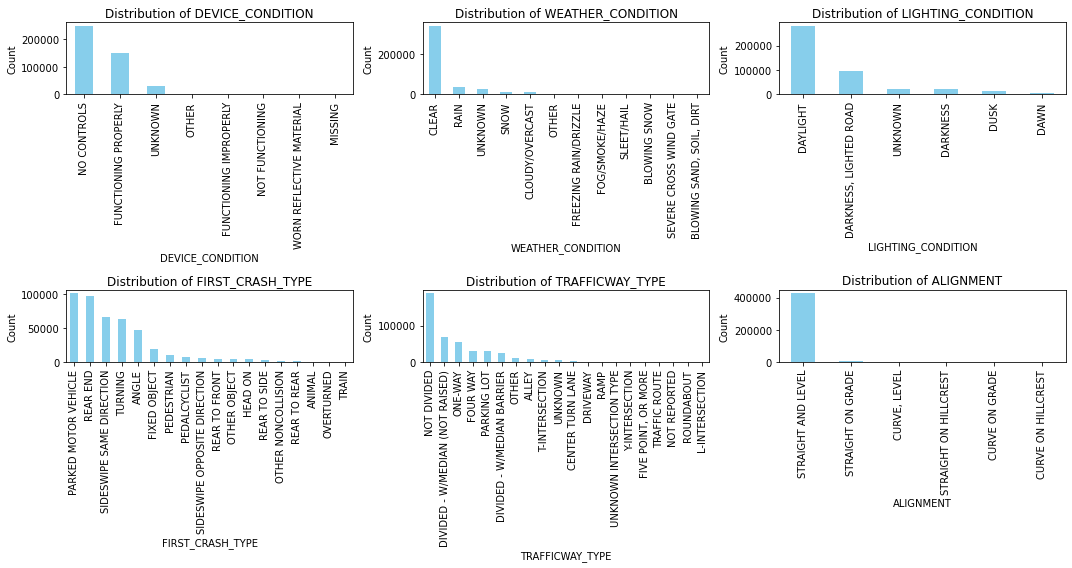

In [22]:
# Determine number of rows and columns for the subplots based on the number of categorical columns
n_cols = 3
n_rows = (len(categorical_columns[:6]) + n_cols - 1) // n_cols  # This ensures enough rows

fig, axes = plt.subplots(2, 3, figsize=(15, 8)) #create subplots

axes = axes.flatten() #flatten axes

#plot each categorical column in a subplot
for i, col in enumerate(categorical_columns[:6]):
    relevant_data[col].value_counts().plot(kind = 'bar', ax=axes[i], color = 'skyblue')
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

#remove empty subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout() #prevent overlapping
plt.show()

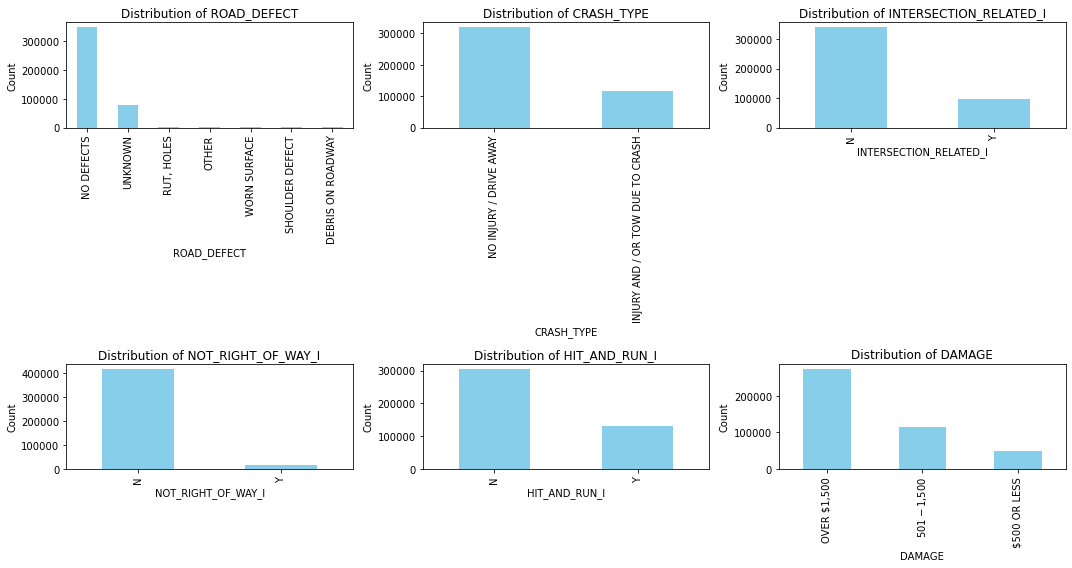

In [23]:
# Determine number of rows and columns for the subplots based on the number of categorical columns
n_cols = 3
n_rows = (len(categorical_columns[7:13]) + n_cols - 1) // n_cols  # This ensures enough rows

fig, axes = plt.subplots(2, 3, figsize=(15, 8)) #create subplots

axes = axes.flatten() #flatten axes

#plot each categorical column in a subplot
for i, col in enumerate(categorical_columns[7:13]):
    relevant_data[col].value_counts().plot(kind = 'bar', ax=axes[i], color = 'skyblue')
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

#remove empty subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout() #prevent overlapping
plt.show()

In [28]:
n_rows = (len(categorical_columns[14:26]) + n_cols - 1)
print(n_rows)

14


In [29]:
# Determine number of rows and columns for the subplots based on the number of categorical columns
n_cols = 7
n_rows = (len(categorical_columns[14:26]) + n_cols - 1) // n_cols  # This ensures enough rows

fig, axes = plt.subplots(5, 6, figsize=(15, 10)) #create subplots

axes = axes.flatten() #flatten axes

#plot each categorical column in a subplot
for i, col in enumerate(categorical_columns[13:23]):
    relevant_data[col].value_counts().plot(kind = 'bar', ax=axes[i], color = 'skyblue')
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

#remove empty subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout() #prevent overlapping
plt.show()

KeyboardInterrupt: 

: 

: 

# 4. Modeling

# 5. Model Validation

# 6. Conclusion and Summary